<a href="https://colab.research.google.com/github/IngerMasha/week8_day2/blob/main/Exercises_XP_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

titanic_data = pd.read_csv('/content/train.csv')
print("First rows DataFrame:")
print(titanic_data.head())



First rows DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [22]:
numerical_features = ['Fare', 'Age']
titanic_data[numerical_features] = titanic_data[numerical_features].fillna(titanic_data[numerical_features].mean())

X_train, X_test, y_train, y_test = train_test_split(titanic_data[numerical_features], titanic_data['Survived'], test_size=0.2, random_state=42)


In [23]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized data:")
print(pd.DataFrame(X_train_scaled, columns=numerical_features).head())


Стандартизированные данные (первые 5 строк):
       Fare       Age
0 -0.078684  1.229207
1 -0.377145 -0.503505
2 -0.474867  0.189580
3 -0.476230 -0.272477
4 -0.025249 -1.812666


In [17]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)
print("Normalized data:")
print(pd.DataFrame(X_train_normalized, columns=numerical_features).head())


Нормализованные данные (первые 5 строк):
       Fare       Age
0  0.055628  0.566474
1  0.025374  0.283740
2  0.015469  0.396833
3  0.015330  0.321438
4  0.061045  0.070118


In [24]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy with StandardScaler: {accuracy_scaled:.2f}')


Accuracy with StandardScaler: 0.65


In [25]:
model_normalized = LogisticRegression()
model_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = model_normalized.predict(X_test_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f'Accuracy with MinMaxScaler: {accuracy_normalized:.2f}')

Accuracy with MinMaxScaler: 0.62


Exercise 2: Creating Composite Features

In [26]:
titanic_data['Family Size'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
print("First rows DataFrame:")
print(titanic_data.head())

First rows DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family Size  
0      0         A/5 21171   7.2500   NaN        S            2  
1      0          PC 17599  71.2833   C85        C            2  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.100

In [28]:
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['Family Size'] == 1, 'IsAlone'] = 1
print("First rows DataFrame:")
print(titanic_data.head())

First rows DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family Size  IsAlone  
0      0         A/5 21171   7.2500   NaN        S            2        0  
1      0          PC 17599  71.2833   C85        C            2        0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1        1 

In [31]:
family_size_survival = titanic_data.groupby('Family Size')['Survived'].mean()
alone_survival = titanic_data.groupby('IsAlone')['Survived'].mean()
print("Survival Rate by Family Size:")
print(family_size_survival)

print("\nSurvival Rate by IsAlone:")
print(alone_survival)

Survival Rate by Family Size:
Family Size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Survival Rate by IsAlone:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Exercise 3: Data Normalization On The Titanic Dataset

In [38]:
import pandas as pd
titanic_data=pd.read_csv('/content/tested.csv')
print("First rows DataFrame:")
print(titanic_data.head())

First rows DataFrame:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [39]:
columns_to_normalize = ['Age', 'Fare']
minmax_scaler = MinMaxScaler()
titanic_data_minmax = titanic_data.copy()
titanic_data_minmax[columns_to_normalize] = minmax_scaler.fit_transform(titanic_data[columns_to_normalize])


In [40]:
zscore_scaler = StandardScaler()
titanic_data_zscore = titanic_data.copy()
titanic_data_zscore[columns_to_normalize] = zscore_scaler.fit_transform(titanic_data[columns_to_normalize])

Text(0, 0.5, 'Frequency')

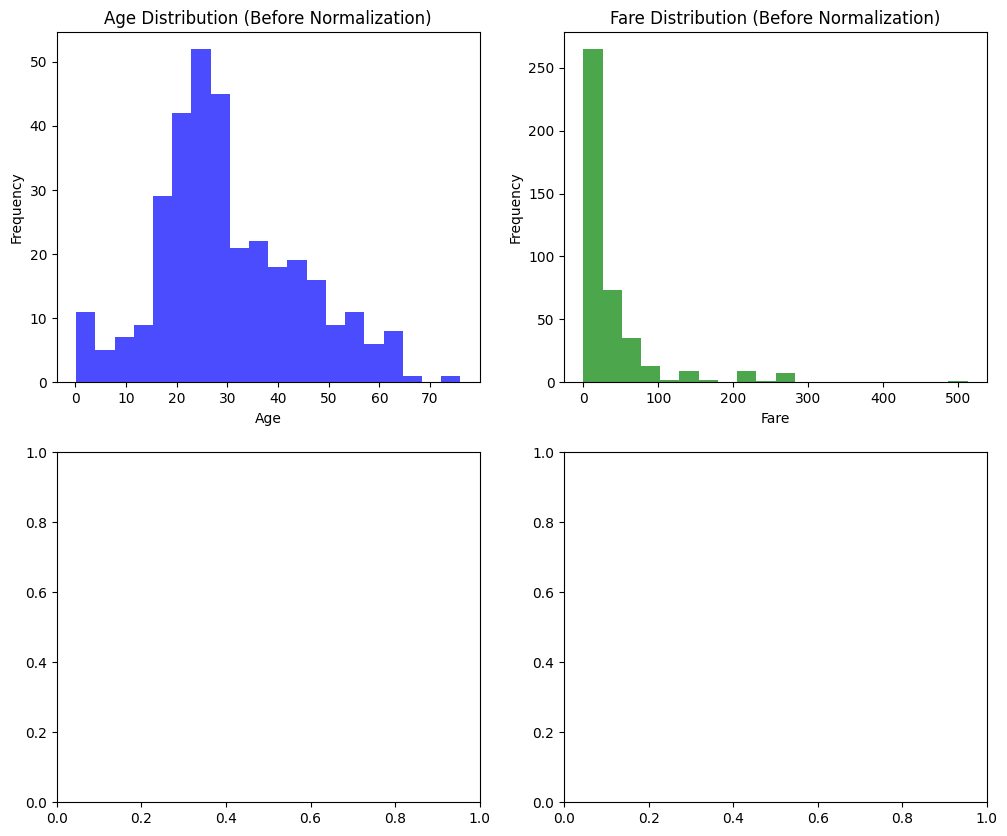

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(titanic_data['Age'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Age Distribution (Before Normalization)')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(titanic_data['Fare'], bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Fare Distribution (Before Normalization)')
axs[0, 1].set_xlabel('Fare')
axs[0, 1].set_ylabel('Frequency')




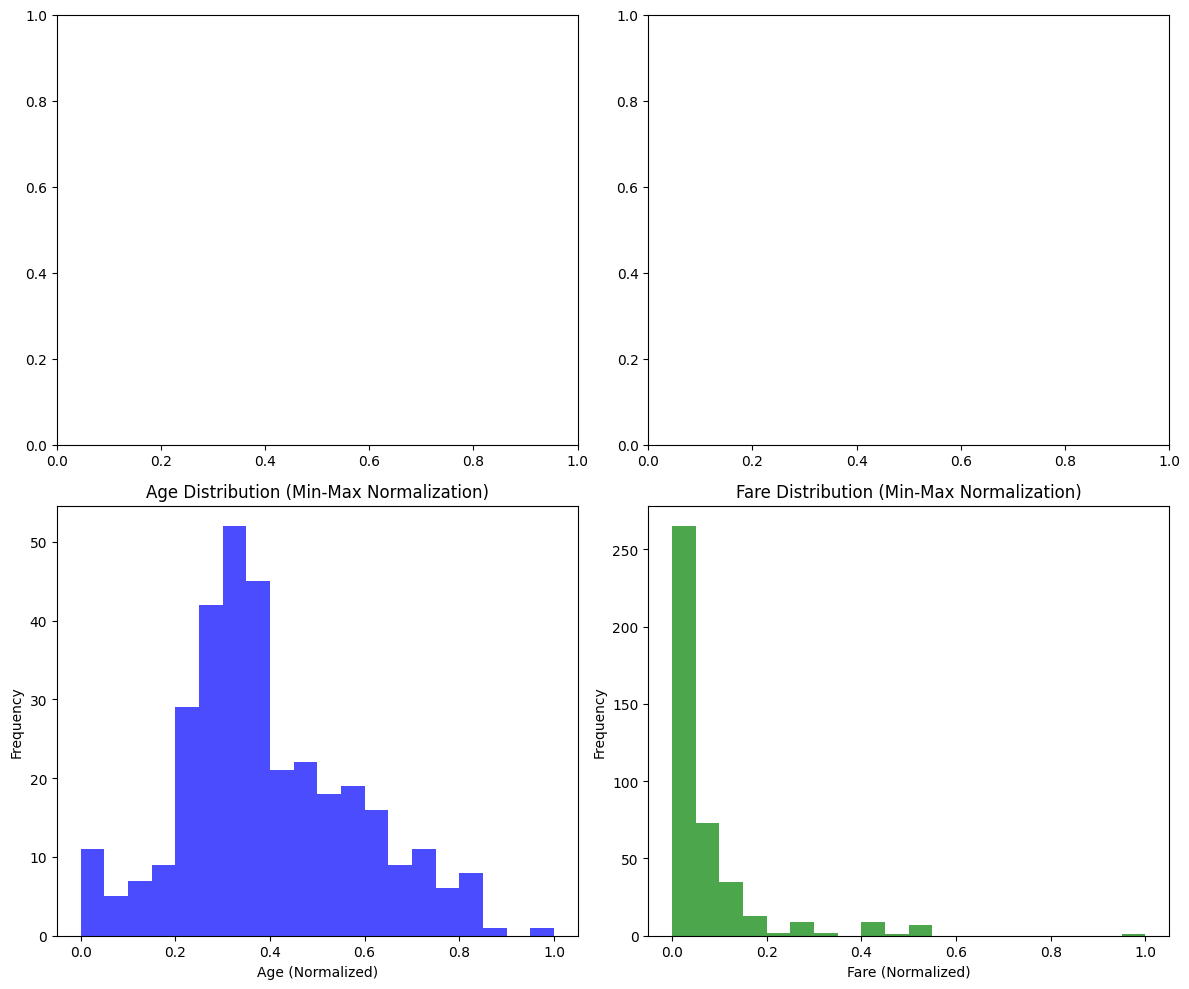

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[1, 0].hist(titanic_data_minmax['Age'], bins=20, color='blue', alpha=0.7)
axs[1, 0].set_title('Age Distribution (Min-Max Normalization)')
axs[1, 0].set_xlabel('Age (Normalized)')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(titanic_data_minmax['Fare'], bins=20, color='green', alpha=0.7)
axs[1, 1].set_title('Fare Distribution (Min-Max Normalization)')
axs[1, 1].set_xlabel('Fare (Normalized)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

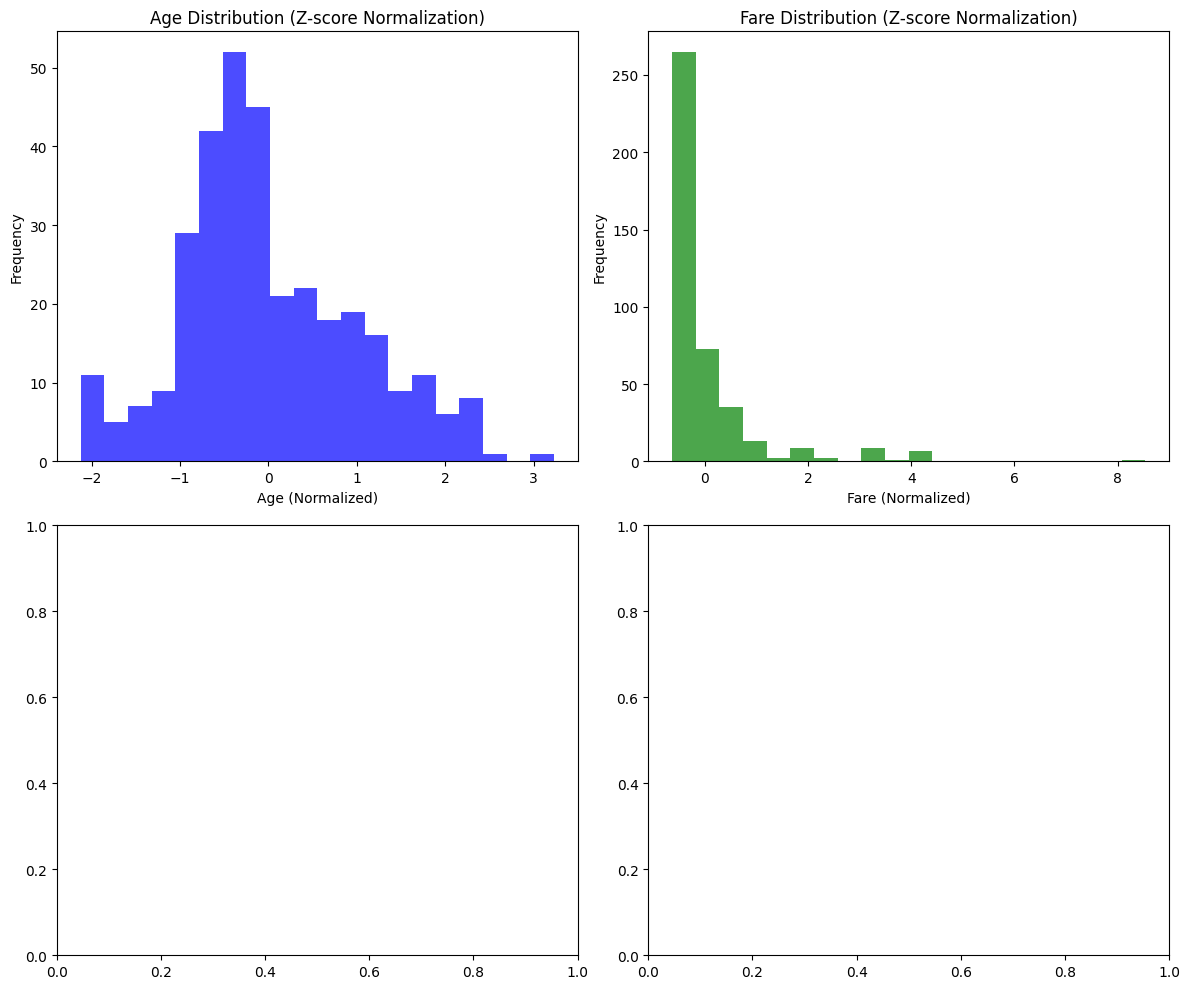

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(titanic_data_zscore['Age'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Age Distribution (Z-score Normalization)')
axs[0, 0].set_xlabel('Age (Normalized)')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(titanic_data_zscore['Fare'], bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Fare Distribution (Z-score Normalization)')
axs[0, 1].set_xlabel('Fare (Normalized)')
axs[0, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Exercise 4 : Data Reduction And Aggregation


In [46]:
import pandas as pd
titanic_data=pd.read_csv('/content/tested.csv')
print("First rows DataFrame:")
print(titanic_data.head())

First rows DataFrame:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [52]:
numerical_columns = ['Age', 'Fare']
X = titanic_data[numerical_columns].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
numerical_columns = ['Age', 'Fare']
X = titanic_data[numerical_columns].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
print(titanic_data.isnull().sum())
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_imputed)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


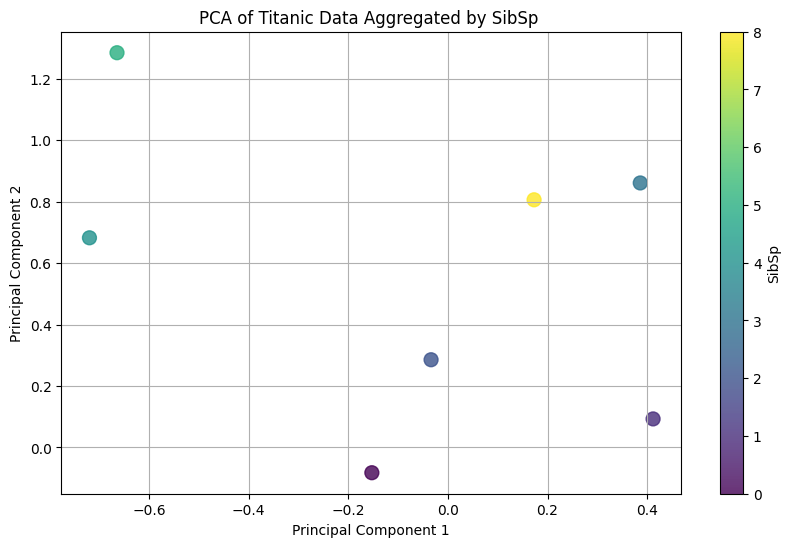

In [64]:
pca_df['SibSp'] = titanic_data['SibSp']
aggregated_data = pca_df.groupby('SibSp').mean()
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['PC1'], aggregated_data['PC2'], c=aggregated_data.index, cmap='viridis', s=100, alpha=0.8)
plt.title('PCA of Titanic Data Aggregated by SibSp ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='SibSp')
plt.grid(True)
plt.show()

Exercise 5: Normalizing E-Commerce Sales Data


In [67]:
import pandas as pd
superstore=pd.read_csv('/content/superstore_dataset.csv',  encoding='latin1')
print("First rows DataFrame:")
print(superstore.head())

First rows DataFrame:
   Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632   1/1/2011  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

         Product ID         Category Sub-Category  \
0  OFF-TEN-10000025  Office S

In [68]:
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

superstore['Sales_normalized'] = min_max_normalize(superstore['Sales'])
superstore['Profit_normalized'] = min_max_normalize(superstore['Profit'])

print("First few rows with normalized columns:")
print(superstore[['Sales', 'Sales_normalized', 'Profit', 'Profit_normalized']].head())

First few rows with normalized columns:
     Sales  Sales_normalized   Profit  Profit_normalized
0  408.300          0.018016  106.140           0.447076
1  120.366          0.005297   36.036           0.442402
2   66.120          0.002901   29.640           0.441976
3   44.865          0.001962  -26.055           0.438263
4  113.670          0.005002   37.770           0.442518


Exercise 6: Aggregating Air Quality Data

In [70]:
import pandas as pd
data=pd.read_csv('/content/city_day.csv')
print("First rows DataFrame:")
print(data.head())

First rows DataFrame:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [74]:
data['Date'] = pd.to_datetime(data['Date'])
aggregated_data = data.groupby([data['City'], data['Date'].dt.month]) \
                             .agg({'PM2.5': 'mean', 'PM10': 'mean', 'NO2': 'mean'})
aggregated_data = aggregated_data.reset_index()
print("Aggregated Air Quality Data:")
print(aggregated_data.head())

# Example of analyzing trends (you can customize this based on your specific analysis needs)
average_PM25_by_month = aggregated_data.groupby('Date')['PM2.5'].mean()
print("Average PM2.5 by Month:")
print(average_PM25_by_month)

Aggregated Air Quality Data:
        City  Date      PM2.5        PM10        NO2
0  Ahmedabad     1  77.719897  113.567419  67.711129
1  Ahmedabad     2  87.431835  144.907931  80.988440
2  Ahmedabad     3  79.911138  108.049355  63.089431
3  Ahmedabad     4  77.516864   81.426000  43.613644
4  Ahmedabad     5  51.904132   98.699796  36.083583

Average PM2.5 by Month:
Date
1     92.813601
2     75.046712
3     56.028143
4     43.661554
5     41.349983
6     34.407928
7     30.012526
8     29.854893
9     34.491374
10    62.354202
11    92.952490
12    96.146578
Name: PM2.5, dtype: float64
